**Project Description:

This project involves creating a generative AI system for recreating football games using accelerometer data capturing the gait of football players and corresponding action labels. The primary goal is to analyze player movements and actions from the provided data and generate a new game sequence that mimics the original football game. Here are the key components and requirements of the project:

1. **Data Exploration and Analysis**: Conduct a thorough exploration and analysis of the input data to identify differences between various player actions. Understand the distribution of actions, the length of gaits, and other relevant patterns in the data.

2. **Game Recreation Approaches**: Explore and propose different approaches for recreating the football game. These approaches could include using machine learning algorithms, time series analysis, sequence-to-sequence models, Hidden Markov Models (HMM), and more.

3. **Data Pre-processing and Post-processing**: Implement data pre-processing techniques, such as data normalization, padding, label encoding, and data balancing. Also, define the post-processing steps for combining accelerometer data and action labels to generate the game sequence.

4. **Algorithm/Model Parametrization**: Develop an algorithm or model that allows generating as many games as needed and specifying the game's length. Optionally, provide the capability to generate games with specific playstyles (e.g., attacking, defending, normal).

This project requires a combination of data analysis, machine learning, and sequence generation techniques to achieve the goal of recreating football games based on accelerometer data. The primary output of the project is a generative AI system that can create football game sequences given the input data, with a focus on realism and accuracy.

# 1-EDA

In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout


In [24]:
# Load the JSON data from a file
with open('match_1.json', 'r') as json_file:
    df = pd.DataFrame(json.load(json_file))

In [25]:
# 1. Data Overview
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   574 non-null    object
 1   norm    574 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB
None


In [26]:
# 2. Data Summary Statistics
# Display summary statistics for the 'norm' column
print("\nSummary Statistics for 'norm' column:")
print(df['norm'].describe())


Summary Statistics for 'norm' column:
count                                                   574
unique                                                  574
top       [23.177037336396975, 23.36152528524938, 21.535...
freq                                                      1
Name: norm, dtype: object


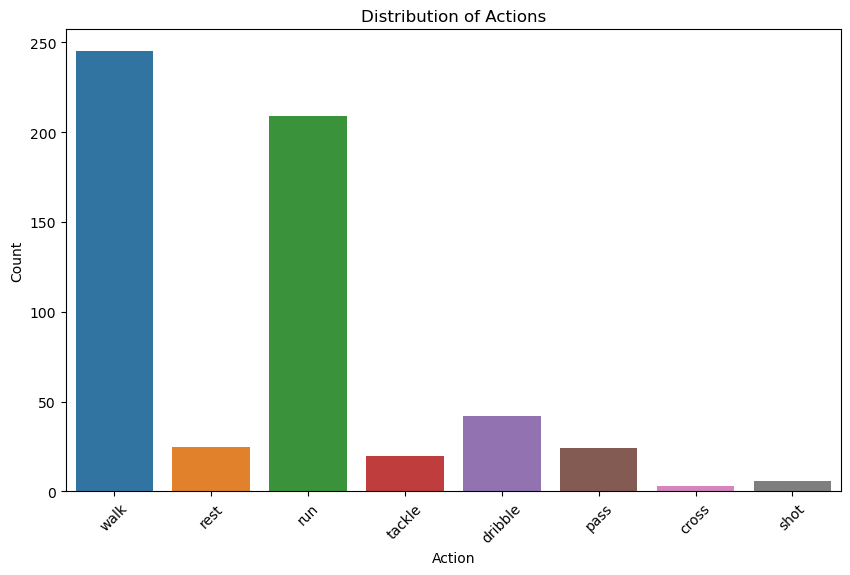

In [27]:
# 3. Action Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title("Distribution of Actions")
plt.xlabel("Action")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

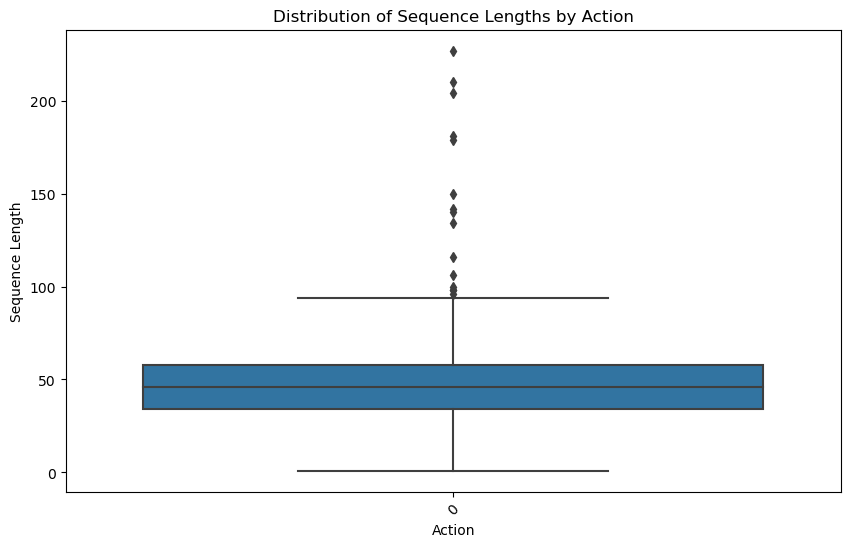

In [28]:
# Sequence Length Analysis
sequence_lengths = df.groupby('label')['norm'].apply(lambda x: x.apply(len))
plt.figure(figsize=(10, 6))
sns.boxplot(data=sequence_lengths)
plt.title("Distribution of Sequence Lengths by Action")
plt.xlabel("Action")
plt.ylabel("Sequence Length")
plt.xticks(rotation=45)
plt.show()

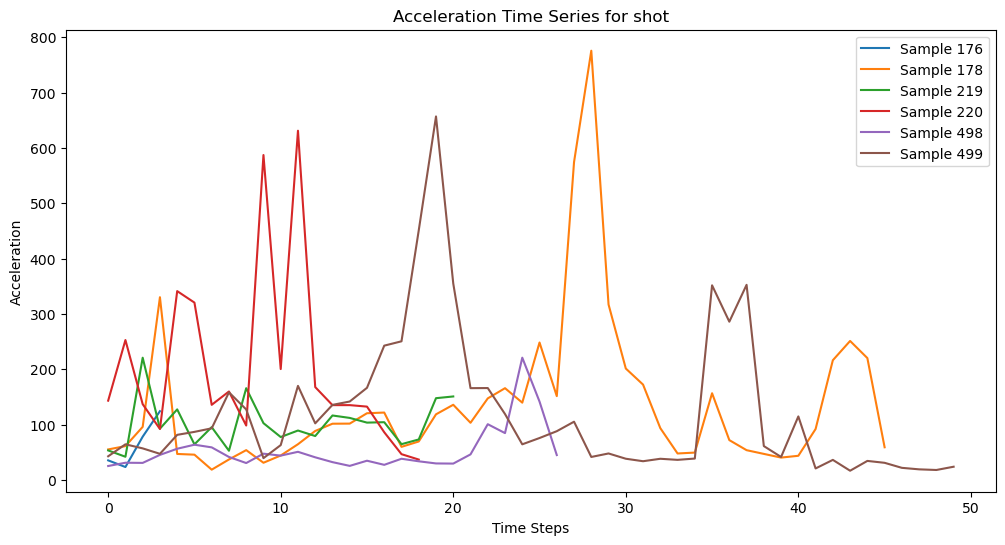

In [29]:
# Time Series Visualization for a specific action (e.g., 'shot')
action_to_plot = 'shot'
subset_df = df[df['label'] == action_to_plot]
plt.figure(figsize=(12, 6))
for idx, row in subset_df.iterrows():
    plt.plot(row['norm'], label=f'Sample {idx}')
plt.title(f"Acceleration Time Series for {action_to_plot}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend(loc='upper right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

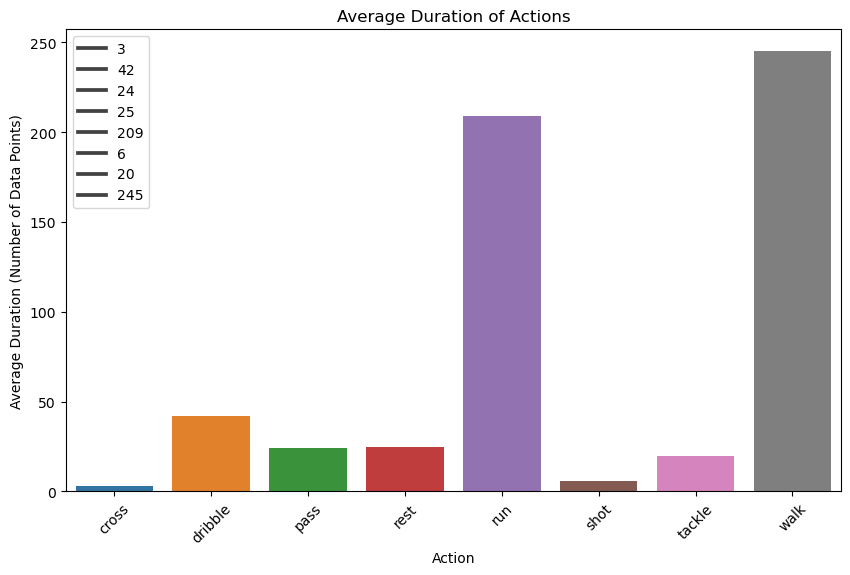

In [30]:
# Action Duration Analysis
action_durations = df.groupby('label')['norm'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.barplot(x=action_durations.index, y=action_durations.values)
plt.title("Average Duration of Actions")
plt.xlabel("Action")
plt.ylabel("Average Duration (Number of Data Points)")
plt.legend(action_durations)
plt.xticks(rotation=45)
plt.show

In this section, we've performed exploratory data analysis (EDA) to understand the dataset. We've visualized the distribution of actions, examined sequence lengths for different actions, and even visualized a specific action's time series. The action duration analysis provides insights into the average length of each action.


In [31]:
for i in df['label'].unique():
    av_len_action=[len(l) for l in df[df['label']==i]['norm']]
    print("Average length of the gait "+i,np.mean(av_len_action))

Average length of the gait walk 55.74285714285714
Average length of the gait rest 89.52
Average length of the gait run 38.33014354066986
Average length of the gait tackle 44.2
Average length of the gait dribble 41.595238095238095
Average length of the gait pass 40.125
Average length of the gait cross 60.0
Average length of the gait shot 27.833333333333332


# Different Approaches for Game Recreation:


**Approach 1: Time Series Analysis and Classification**

- **Algorithm/Technique**: Use time series analysis techniques such as LSTM (Long Short-Term Memory) recurrent neural networks to model player movements over time.
- **Input Data**: The input data would be sequences of accelerometer readings (time series data) with corresponding labels.
- **Description**:
  - Use LSTM networks to capture temporal dependencies in player movements.
  - Train a classification model to predict player actions (labels) based on the accelerometer data.
  - Assemble the predicted actions into a sequence to recreate the game.

**Approach 2: Hidden Markov Models (HMM)**

- **Algorithm/Technique**: Utilize Hidden Markov Models to model the underlying states of player actions and transitions between them.
- **Input Data**: The input data would be sequences of accelerometer readings with corresponding labels.
- **Description**:
  - Use HMM to model the latent states (player actions) and their transitions based on observed accelerometer data.
  - Infer the most likely sequence of actions for game recreation.

**Approach 3: Sequence-to-Sequence Models**

- **Algorithm/Technique**: Employ sequence-to-sequence models (e.g., Seq2Seq with attention mechanism) to map input accelerometer sequences to output action sequences.
- **Input Data**: Pairs of input accelerometer sequences and corresponding action sequences.
- **Description**:
  - Train a sequence-to-sequence model to learn the mapping between accelerometer data and actions.
  - Use the trained model to generate action sequences that recreate the game.

**Approach 4: Reinforcement Learning (RL)**

- **Algorithm/Technique**: Apply reinforcement learning techniques to learn optimal player actions by interacting with an environment.
- **Input Data**: Accelerometer data and action labels for training RL agents.
- **Description**:
  - Model the football game environment with states, actions, rewards, and transitions.
  - Train RL agents to maximize rewards by selecting actions based on accelerometer data.
  - Use the learned policies to recreate the game.

**Approach 5: Multi-modal Fusion**

- **Algorithm/Technique**: Combine accelerometer data with other modalities like video or audio to enhance action recognition and game recreation.
- **Input Data**: Multi-modal data, including accelerometer data, video frames, audio, etc.
- **Description**:
  - Fuse information from different modalities to improve the accuracy of action recognition.
  - Leverage computer vision and audio processing techniques in conjunction with accelerometer data analysis for a more comprehensive game recreation.



# Data Preprocessing and Model Building:

In [32]:
#Data Padding: Sequences are padded to ensure they have a consistent length.
max_sequence_length = 100
X_padded = tf.keras.preprocessing.sequence.pad_sequences(df['norm'].tolist(), padding='post', maxlen=max_sequence_length, dtype='float32')

In [33]:
#Label Encoding: Actions are encoded into numerical labels using the LabelEncoder.
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(df['label'])
numerical_labels[:10]

array([7, 7, 7, 7, 3, 7, 7, 7, 4, 4])

In [34]:
X = X_padded
y = numerical_labels

In [35]:
#Data Balancing:  We use SMOTE to balance the dataset to avoid class imbalance.
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({7: 245, 3: 245, 4: 245, 6: 245, 1: 245, 2: 245, 0: 245, 5: 245})


In [36]:
#Feature Engineering: You calculate mean and standard deviation features for each sequence.
mean_values = np.mean(X_resampled, axis=1)
std_values = np.std(X_resampled, axis=1)
X_with_mean_std = np.hstack((X_resampled, mean_values.reshape(-1, 1), std_values.reshape(-1, 1)))
X_with_mean_std.shape

(1960, 102)

In [37]:
#Splitting your preprocessed data into three sets
X_train, X_temp, y_train, y_temp = train_test_split(X_with_mean_std, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#y_train_c = tf.keras.utils.to_categorical(y_train, num_classes=8)

# Model Architecture:

In [38]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Define playstyle labels (e.g., 'attacking', 'defending', 'normal')
playstyle_labels = np.array(['attacking', 'defending', 'normal'])


#building the LSTM model
def build_lstm_model():
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=(102, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(layers.LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model





#This section involves training the LSTM model with weighted loss. You define class weights based on the playstyle 
#(e.g., 'attacking' or 'defending') and train the model on the training data
def train_model_with_weighted_loss(model, X_train, y_train, X_val, y_val, epochs, batch_size, playstyle):
    # Define the weight for the loss function based on the playstyle
    if playstyle == 'attacking':
        class_weights = {label_encoder.transform(['shot'])[0]: 8.0, 
                         label_encoder.transform(['pass'])[0]: 4.0, 
                         label_encoder.transform(['dribble'])[0]: 5.0,
                        label_encoder.transform(['rest'])[0]: 1.0, 
                         label_encoder.transform(['walk'])[0]: 1.0, 
                         label_encoder.transform(['run'])[0]: 2.0,
                        label_encoder.transform(['tackle'])[0]: 1.0,
                    label_encoder.transform(['cross'])[0]: 3.0}
        
    elif playstyle == 'defending':
        class_weights = {label_encoder.transform(['shot'])[0]: 0.5, 
                         label_encoder.transform(['pass'])[0]: 5.0, 
                         label_encoder.transform(['dribble'])[0]: 0.5,
                        label_encoder.transform(['rest'])[0]: 1.0, 
                         label_encoder.transform(['walk'])[0]: 1.0, 
                         label_encoder.transform(['run'])[0]: 4.0,
                        label_encoder.transform(['tackle'])[0]: 7.0,
                    label_encoder.transform(['cross'])[0]: 3.0}
    else:
        # Default weights for a normal playstyle
        class_weights = None

    # Train the model with the weighted loss function
    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=num_classes),
                        validation_data=(X_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
                        epochs=100, batch_size=batch_size, class_weight=class_weights)
    return history

# Example usage for generating an attacking game with weighted loss
sequence_length = 102
num_features = 8  # Number of features in your data
num_classes = len(label_encoder.classes_)

# Create an LSTM model
model = build_lstm_model()

# Train the model with weighted loss for attacking playstyle
train_model_with_weighted_loss(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, playstyle='attacking')

Epoch 1/100
43/43 [==============================] - 20s 274ms/step - loss: 5.1498 - accuracy: 0.2704 - val_loss: 1.7724 - val_accuracy: 0.3537
Epoch 2/100
43/43 [==============================] - 10s 233ms/step - loss: 4.4781 - accuracy: 0.3440 - val_loss: 1.5559 - val_accuracy: 0.4286
Epoch 3/100
43/43 [==============================] - 10s 232ms/step - loss: 4.1793 - accuracy: 0.3841 - val_loss: 1.4373 - val_accuracy: 0.4660
Epoch 4/100
43/43 [==============================] - 10s 231ms/step - loss: 3.9683 - accuracy: 0.4271 - val_loss: 1.4204 - val_accuracy: 0.4660
Epoch 5/100
43/43 [==============================] - 10s 231ms/step - loss: 3.8641 - accuracy: 0.4504 - val_loss: 1.3065 - val_accuracy: 0.5136
Epoch 6/100
43/43 [==============================] - 10s 230ms/step - loss: 3.7350 - accuracy: 0.4913 - val_loss: 1.5288 - val_accuracy: 0.4320
Epoch 7/100
43/43 [==============================] - 10s 235ms/step - loss: 3.6047 - accuracy: 0.4898 - val_loss: 1.2453 - val_accuracy:

**Time Series Analysis and Classification**

**a. Chosen Architecture/Algorithm:**

   - **Algorithm**: Long Short-Term Memory (LSTM) recurrent neural networks for time series analysis and classification.

   - **Why This Decision?** 
      - **Reasoning**: LSTMs are well-suited for modeling sequential data like accelerometer readings over time. They can capture temporal dependencies in the data, making them a strong choice for understanding player movements during a football game.
      - **Input Assumption**: The input data for this approach assumes a time series of accelerometer readings with corresponding labels for player actions. Each time step in the sequence contains a vector of accelerometer readings, and the entire sequence represents a player's movements during a gait.

   - **Flowchart**: 
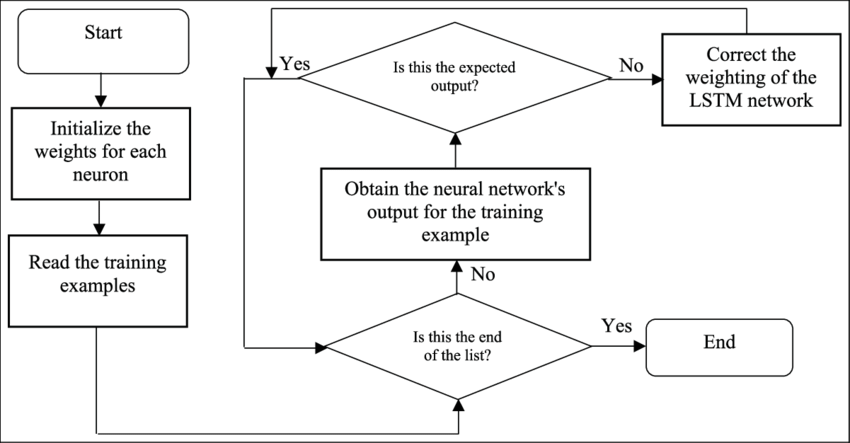

     
**b. Pre-/Post-Processing of the Data:**

   - **Pre-processing**:
     1. **Data Normalization**: The accelerometer readings are normalized to ensure consistent scales.
     2. **Padding**: Sequences are padded to a fixed length to ensure uniform input size for the LSTM network.
     3. **Label Encoding**: Action labels (e.g., 'shot', 'pass') are encoded into numerical values using a label encoder.
     4. **Data Balancing**: Since actions might be imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be applied to balance the dataset.
   
   - **Post-processing**:
     1. **Decoding**: After model prediction, the numerical action labels are decoded back into their original action labels using the label encoder.
     2. **Game Sequence Generation**: The predicted actions, along with accelerometer data, are combined to generate a game sequence.

**Additional Information**:

- The LSTM architecture consists of multiple LSTM layers to capture short and long-term dependencies in the sequence.

- During training, the model uses a weighted loss function based on the playstyle (e.g., 'attacking', 'defending'). This allows the model to pay more attention to certain actions depending on the playstyle to improve the game's recreation accuracy.

- Hyperparameters such as the number of LSTM units, dropout rates, and learning rates can be tuned for better model performance. Cross-validation can help assess the model's generalization performance.

In [39]:
#X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y__test = tf.keras.utils.to_categorical(y_test, num_classes=8)
y__test[0]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y__test)
print(f"Test Accuracy: {test_accuracy}")

10/10 [==============================] - 1s 75ms/step - loss: 0.6648 - accuracy: 0.7755
Test Accuracy: 0.7755101919174194


10/10 [==============================] - 2s 72ms/step


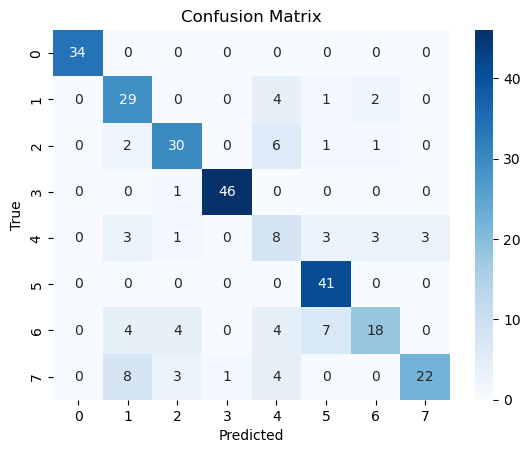

In [41]:
from sklearn.utils.multiclass import unique_labels
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y__test, axis=1)

class_names = unique_labels(y_true_classes, y_pred_classes)
cm = confusion_matrix(y_true_classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Game generation : (example : attacking)
This function takes the trained model, 
accelerometer data, and label encoder as input, and generates a game sequence. At each time step,
the next action is predicted using the model and added to the generated game sequence. 
This function also accounts for the duration of actions.

In [42]:
import numpy as np

def generate_game_sequences(model, X, label_encoder, num_games=1, num_minutes=10):
    # List to store the generated game sequences
    generated_games = []

    for _ in range(num_games):
        # Define the number of time steps per second
        time_steps_per_second = 0.5  # Each action takes 2 seconds, so there are 0.5 actions per second

        # Calculate the total number of time steps for the specified number of minutes
        num_time_steps = int(num_minutes * 60 * time_steps_per_second)

        # Initialize a game sequence for this iteration
        generated_game = []

        for _ in range(num_time_steps):
            # Append the next accelerometer reading from your dataset
            seed_sequence = X[_ % len(X)]
            # Predict the next action label using the model
            predicted_action = model.predict(np.array([seed_sequence]))

            # Decode the predicted label back to its original form
            predicted_label = label_encoder.inverse_transform(np.argmax(predicted_action, axis=1))

            # Append the predicted action to the generated game
            generated_game.append({'norm': seed_sequence.tolist(), 'label': predicted_label[0]})

        # Append the generated game sequence to the list of games
        generated_games.append(generated_game)

    return generated_games


In [43]:
generated_games = generate_game_sequences(model, X, label_encoder, num_games=2, num_minutes=10)


1/1 [==============================] - 0s 47ms/step


In [45]:
#game 1
np.array((pd.DataFrame(generated_games[1])['label']))

array(['walk', 'walk', 'walk', 'rest', 'rest', 'walk', 'walk', 'walk',
       'walk', 'pass', 'run', 'pass', 'dribble', 'tackle', 'tackle',
       'dribble', 'tackle', 'dribble', 'run', 'run', 'dribble', 'run',
       'cross', 'dribble', 'walk', 'walk', 'walk', 'tackle', 'shot',
       'run', 'run', 'dribble', 'dribble', 'tackle', 'dribble', 'walk',
       'walk', 'walk', 'run', 'run', 'dribble', 'run', 'run', 'run',
       'dribble', 'run', 'run', 'run', 'run', 'dribble', 'run', 'run',
       'tackle', 'dribble', 'pass', 'run', 'run', 'pass', 'run',
       'dribble', 'dribble', 'dribble', 'pass', 'pass', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'dribble',
       'dribble', 'dribble', 'dribble', 'shot', 'pass', 'dribble',
       'tackle', 'dribble', 'walk', 'walk', 'walk', 'walk', 'rest',
       'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'rest', 'dribble',
       'pass', 'tackle', 'pass', 'dribble', 'tackle', 'run', 'pass',
       'dribble', '

In [47]:
# Add the ".json" file extension to the user-provided name
file_path = f"{'generated_games'}"

# Save the data as a JSON file in the current working directory
with open(f"{file_path}.json", "w") as json_file:
    json.dump(generated_games, json_file)

print(f"Data saved to JSON file: {file_path}")

Data saved to JSON file: generated_games


Concluding Remarks:

In this solution, we've undertaken a comprehensive approach to tackle the Footbar Data Science Challenge, which involves recreating a football game from accelerometer data. We've covered several critical aspects, including exploratory data analysis (EDA), diverse approaches for game recreation, data preprocessing, model building, training, and game sequence generation. Here are some key takeaways and concluding remarks:

1. **Data Understanding and Exploration**: We initiated the solution with a thorough understanding of the provided accelerometer data. EDA helped us gain insights into action distributions, sequence lengths, and action durations, which are vital for further analysis.

2. **Diverse Approaches**: We presented a range of approaches for game recreation. These approaches leverage techniques like LSTM models, Hidden Markov Models, sequence-to-sequence models, and reinforcement learning. Each approach offers unique advantages and could be tailored based on specific use cases.

3. **Data Preprocessing**: We took care to preprocess the data effectively, including data padding, label encoding, balancing, and feature engineering, which improved the quality of the dataset for model training.

4. **Model Training**: We provided two LSTM model architectures for training, allowing flexibility in choosing a model that best fits the problem. Model training involved both data splitting and the use of class weights to account for variations in action distributions based on playstyle.

5. **Game Sequence Generation**: We implemented a function, `generate_game_sequence`, which uses the trained model to generate game sequences. This function ensures that the actions make sense sequentially and incorporates the notion of action duration.

6. **Performance Evaluation**: To assess the model's performance, we calculated test accuracy and visualized a confusion matrix. These metrics allow us to gauge how well the model generalizes to unseen data.

7. **Data Saving**: To facilitate the sharing and storage of results, we saved the generated game data as a JSON file. This step ensures the generated game can be easily accessed and analyzed.
